# 1. Data Preprocessing

In [2]:
import os
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
PATH = "C:/Users/maeng/desktop/wafer"
NORMAL_PATH = os.path.join(PATH, "normal")
ABNORMAL_PATH = os.path.join(PATH, "abnormal")

In [4]:
def preprocessing(x):
    with open(os.path.join(NORMAL_PATH, i + x)) as file:
        data = file.read()
        data = data.split("\t")
        data = [i.split("\n") for i in data]
        
        idx = data[0::2]
        idx = [float(i[-1]) for i in idx[:-1]]
        
        sensor = data[1::2]
        sensor = [float(i[-1]) for i in sensor]
        
    return idx, sensor

def ab_preprocessing(x):
    with open(os.path.join(ABNORMAL_PATH, i + x)) as file:
        data = file.read()
        data = data.split("\t")
        data = [i.split("\n") for i in data]
        
        idx = data[0::2]
        idx = [float(i[-1]) for i in idx[:-1]]
        
        sensor = data[1::2]
        sensor = [float(i[-1]) for i in sensor]
        
    return idx, sensor

In [5]:
#정상 데이터 로드(1개의 제품 당 6개의 센서로 구성)
normal_list = os.listdir(NORMAL_PATH)
normal_list = sorted(list(set([i.split(".")[0] for i in normal_list])))

normal_data = list()
for j, i in enumerate(normal_list):
    
    row = list()
    _, sensor = preprocessing(".6")
    row.append(sensor)
    _, sensor = preprocessing(".7")
    row.append(sensor)
    _, sensor = preprocessing(".8")
    row.append(sensor)
    _, sensor = preprocessing(".11")
    row.append(sensor)
    _, sensor = preprocessing(".12")
    row.append(sensor)
    _, sensor = preprocessing(".15")
    row.append(sensor)
    
    #작업시간이 120초 이하인 데이터는 사용하지 않음
    if len(row[0]) >= 120:
        normal_data.append(row)

In [6]:
#보간법을 사용하여 시간 길이를 맞추기
normal_data1 = list()

for i in normal_data:

    row = list()
    
    f = interpolate.interp1d(range(len(i[0])), i[0], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[1])), i[1], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[2])), i[2], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[3])), i[3], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[4])), i[4], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[5])), i[5], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)        
    
    normal_data1.append(row)

In [7]:
#6개의 센서 데이터를 이어붙이기(120초 * 6) - 의사결정트리를 이용한 분류 문제에 적용시키기 위함
normal_data1 = np.array(normal_data1)
print(normal_data1.shape)
normal_data2 = normal_data1.reshape(1058, 720)
print(normal_data2.shape)

(1058, 6, 120)
(1058, 720)


In [8]:
#비정상 데이터 로드 - 정상 데이터와 전처리 방식은 동일
abnormal_list = os.listdir(ABNORMAL_PATH)
abnormal_list = sorted(list(set([i.split(".")[0] for i in abnormal_list])))

abnormal_data = list()
for j, i in enumerate(abnormal_list):
    
    row = list()
    _, sensor = ab_preprocessing(".6")
    row.append(sensor)
    _, sensor = ab_preprocessing(".7")
    row.append(sensor)
    _, sensor = ab_preprocessing(".8")
    row.append(sensor)
    _, sensor = ab_preprocessing(".11")
    row.append(sensor)
    _, sensor = ab_preprocessing(".12")
    row.append(sensor)
    _, sensor = ab_preprocessing(".15")
    row.append(sensor)
    
    if len(row[0]) >= 120:
        abnormal_data.append(row)

abnormal_data1 = list()

for i in abnormal_data:

    row = list()
    
    f = interpolate.interp1d(range(len(i[0])), i[0], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[1])), i[1], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[2])), i[2], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[3])), i[3], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[4])), i[4], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)
    f = interpolate.interp1d(range(len(i[5])), i[5], kind = "quadratic")
    sensor = list(f(range(120)))
    row.append(sensor)        
    
    abnormal_data1.append(row)

abnormal_data1 = np.array(abnormal_data1)

abnormal_data2 = abnormal_data1.reshape(125, 720)

In [21]:
#정상 데이터와 비정상 데이터 통합 및 라벨 부여(0: 정상 / 1 : 비정상)
normal = pd.DataFrame(normal_data2)
normal["y"] = 0
abnormal = pd.DataFrame(abnormal_data2)
abnormal["y"] = 1

data = pd.concat([normal, abnormal], sort = False)
data

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,y
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-97.0,9.436896e-16,0.0,-1.000000e+00,6.505213e-18,1.517883e-18,-2.710505e-20,0.000000e+00,0.000000e+00,0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-96.0,-9.600000e+01,-6.0,6.938894e-17,5.551115e-17,-1.000000e+00,-1.734723e-18,-2.059984e-18,1.084202e-19,0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-97.0,-3.774758e-15,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.551115e-17,-1.000000e+00,0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,-116.0,-1.160000e+02,-116.0,-1.160000e+02,-1.160000e+02,-2.000000e+00,-1.000000e+00,1.387779e-17,-3.469447e-18,0
4,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-115.0,-1.150000e+02,-115.0,-1.150000e+02,-1.150000e+02,-1.150000e+02,-1.150000e+02,-1.150000e+02,-1.150000e+02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-5.0,-6.0,-5.0,-5.0,-5.0,-6.0,-5.0,-6.0,-6.0,-6.0,...,-98.0,-9.800000e+01,-97.0,-9.700000e+01,-9.800000e+01,-9.800000e+01,-1.000000e+02,-1.010000e+02,-1.010000e+02,1
121,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-76.0,-7.500000e+01,-75.0,-7.500000e+01,-7.400000e+01,-7.400000e+01,-7.400000e+01,-7.400000e+01,-7.400000e+01,1
122,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-122.0,-1.220000e+02,-122.0,-1.220000e+02,-1.220000e+02,-1.220000e+02,-1.210000e+02,-1.210000e+02,-1.210000e+02,1
123,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-99.0,-9.900000e+01,-98.0,-9.800000e+01,-9.800000e+01,-9.800000e+01,-9.800000e+01,-9.700000e+01,-9.700000e+01,1


Text(0, 0.5, 'value')

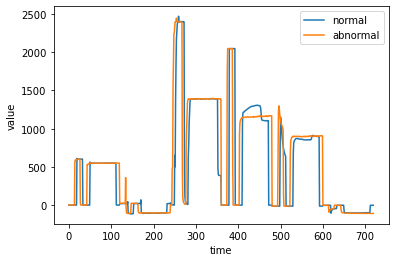

In [10]:
#정상 데이터와 비정상 데이터의 예시 Plot(x축의 120초 간격으로 다른 센서)
plt.plot(normal.iloc[0, :-1], label = "normal")
plt.plot(abnormal.iloc[0, :-1], label= "abnormal")
plt.legend()
plt.xlabel("time")
plt.ylabel("value")

# 2. Modeling Data

In [11]:
from sklearn.model_selection import train_test_split

#학습 및 테스트 비율 7:3
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, 0:720], data.iloc[:,720], test_size = 0.3)

# 3. Adaboost
#### 파라미터 참조 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [23]:
from sklearn.ensemble import AdaBoostClassifier
model_Ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)
model_Ada = model_Ada.fit(X_train, Y_train)
pred = model_Ada.predict(X_test)

print("Adaboost")
print(pd.crosstab(Y_test, pred, margins = True, rownames = ["real"], colnames = ["pred"]))

Adaboost
pred    0   1  All
real              
0     318   2  320
1       2  33   35
All   320  35  355


# 4. Time Importance (Top10)

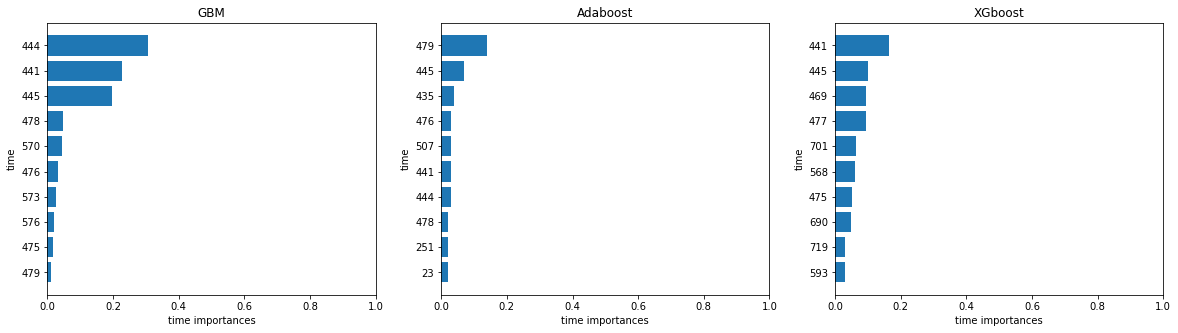

In [25]:
plt.figure(figsize = (20, 5))

plt.title("Adaboost")
fi = model_Ada.feature_importances_
idx = (-fi).argsort()[0:10]
fi = fi[idx]
plt.barh(range(10), fi[::-1], align='center')
plt.xlim(0, 1)
plt.yticks(range(10), idx[::-1])
plt.xlabel('time importances', size=10)
plt.ylabel('time', size=10)

plt.show() 